<a href="https://colab.research.google.com/github/arpitvijayvargia/Neural-network/blob/master/Arpit_musk_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries that will be used during process
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
#mounting drive to load our data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing data from the drive using pandas
data = pd.read_csv('/content/drive/My Drive/musk_csv.csv')

In [0]:
#removing NAN values from the data
data = data.apply (pd.to_numeric, errors='coerce')
#let's see the sahpe of our data
data.shape

(6598, 170)

In [0]:
#let's see few rows our data
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,NaN,NaN,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,NaN,NaN,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,NaN,NaN,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,NaN,NaN,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,NaN,NaN,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [0]:
#let's find out how much data belong to 'musk' class
over_all_musk = pd.DataFrame(data[data['class'] == 1])

In [0]:
over_all_musk.shape

(1017, 170)

In [0]:
#let's see how much data belong's to 'non-musk' class
over_all_non_musk = pd.DataFrame(data[data['class'] == 0])

In [0]:
over_all_non_musk.shape

(5581, 170)

From above we can clearly see that our data is biased i.e only approx 15% of data is of one class

So, now we will take equal number of rows for each class to improve our model performance


In [0]:
over_all_non_musk =  over_all_non_musk[0:1017]

In [0]:
#joing both data using concat function in pandas
data = pd.concat([over_all_musk,over_all_non_musk], axis=0)

In [0]:
#let's shuffle our data
from sklearn.utils import shuffle
data = shuffle(data)

In [0]:
#let's drop the unwanted columns which we not be using during our process
data.drop(['molecule_name','conformation_name'], axis = 1 , inplace= True)

In [0]:
#Seperate the input feature and target variables
x = data.drop(columns=['class'])
y = data['class']

In [0]:
#Splitting our data using train_test_split 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [0]:
#Let's have a glance towards the shape of our data
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1627, 167), (1627,), (407, 167), (407,))

In [0]:
#Define the Model - 3 layers (2 hidden layers with 100 nodes each and 1 output layer with a single)

#defifne a sequentail Model
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=167,kernel_regularizer=l2(0.02)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Let's check the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               16800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 27,001
Trainable params: 27,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Let's train our model
model_output = model.fit(x_train,y_train,epochs=50,batch_size=5,verbose=1,validation_data=(x_test,y_test),)




Train on 1627 samples, validate on 407 samples
Epoch 1/50





1627/1627 [==============================] - 1s 596us/step - loss: 6.3728 - acc: 0.7357 - val_loss: 2.9151 - val_acc: 0.9509
Epoch 2/50
1627/1627 [==============================] - 1s 395us/step - loss: 5.0931 - acc: 0.8076 - val_loss: 3.3820 - val_acc: 0.9189
Epoch 3/50
1627/1627 [==============================] - 1s 380us/step - loss: 3.7042 - acc: 0.8943 - val_loss: 2.6350 - val_acc: 0.9607
Epoch 4/50
1627/1627 [==============================] - 1s 379us/step - loss: 3.0355 - acc: 0.9305 - val_loss: 2.0023 - val_acc: 0.9926
Epoch 5/50
1627/1627 [==============================] - 1s 373us/step - loss: 4.0520 - acc: 0.8593 - val_loss: 6.5893 - val_acc: 0.6978
Epoch 6/50
1627/1627 [==============================] - 1s 374us/step - loss: 4.3219 - acc: 0.8420 - val_loss: 2.3801 - val_acc: 0.9656
Epoch 7/50
1627/1627 [==============================] - 1s 373us/step - loss: 3.3884 - acc: 0.8992 - val_loss: 2.2219 - val_acc: 

In [0]:
#Let's check the model performance
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.9291456705776915
Validation Accuracy :  0.9555773978078101


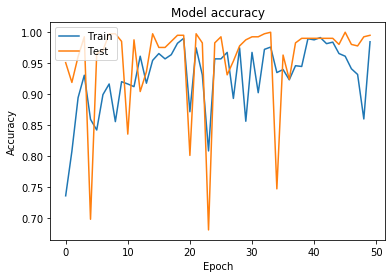

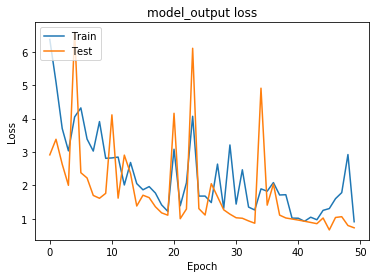

In [0]:
#Let's visualise our model performance

# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [0]:
confusion_matrix(y_test,y_pred1)

array([[201,   0],
       [  2, 204]])

In [0]:
precision_score(y_test,y_pred1)

1.0

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,y_pred1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred1)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_pred1)
print('F1 score: %f' % f1)

Accuracy: 0.995086
Precision: 1.000000
Recall: 0.990291
F1 score: 0.995122


In [0]:
model.save("Calssifier.h5")